# FUNCIÓN DE PRODUCCIÓN: COBB-DOUGLAS

Librerías:

In [45]:
import math #operaciones matemáticas
import numpy as np #gestión numérica
import pandas as pd #estructuras de datos
import matplotlib.pyplot as plt #gráficos
import seaborn as sns #gráficos
from sklearn.linear_model import LinearRegression #regresión lineal
lr = LinearRegression()

Carga de datos:

In [46]:
datos = "EAS_2018.csv" #archivo con los datos
db = pd.read_csv(datos, sep=';') #we're in
db.head() #vista previa de los datos

,idnoremp,Seccion18,Division,periodo,intio,pottcag,gppgpa,ocgtot,CONINTER,OTROSG,...,gppdocen,gppgpaed1,gppmoni,gppgpned1,gppgpned2,gppgpned3,gpptpoted1,gpptpoted2,gpptpoted3,opcomex
0,10001,I1,55,2018,2661282.0,0.0,30600.0,1522029.0,1337412.0,89191.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
1,10002,I1,55,2018,4355860.0,0.0,19692.0,2410700.0,2355473.0,7845.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
2,10003,I1,55,2018,14967912.0,115.0,37122.0,10343391.0,9759456.0,75258.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
3,10004,I1,55,2018,10666938.0,0.0,21944.0,5924967.0,5813284.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4
4,10005,I2,56,2018,24247713.0,138.0,42248.0,21505783.0,20862660.0,319610.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4


In [47]:
db.shape

(6321, 161)

In [ ]:
db.isna().any()
#db.isna().sum()

In [54]:
#realizo una copia de los datos para no alterar la db original
db_clean = db[['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp', 'ocgnr']]
db_clean.head()

,PROBRU,TOTG,insertot,VALAGRE,gppgpa,ocgco,ocgpp,ocgnr
0,2661282.0,1095630.0,2518262.0,1323870,30600.0,60127.0,2819.0,188284.0
1,4355860.0,1767399.0,2185760.0,2000387,19692.0,23000.0,58000.0,177000.0
2,14967912.0,2869476.0,6914281.0,5208456,37122.0,56159.0,30711.0,250014.0
3,10666938.0,844514.0,8309250.0,4853654,21944.0,23127.0,54097.0,543956.0
4,24247713.0,2698819.0,6779595.0,3385053,42248.0,167731.0,0.0,3205218.0


In [55]:
db_clean.describe()

,PROBRU,TOTG,insertot,VALAGRE,gppgpa,ocgco,ocgpp,ocgnr
count,6.110000e+03,6.112000e+03,6.186000e+03,6.321000e+03,6.112000e+03,6.112000e+03,6.112000e+03,6.112000e+03
mean,2.894635e+07,9.922812e+06,2.742796e+07,1.505785e+07,5.580526e+04,1.659653e+05,3.059961e+05,5.001060e+05
std,1.314335e+08,2.635969e+07,1.259099e+08,6.768556e+07,1.838886e+05,6.231723e+05,3.273006e+06,3.580351e+06
min,0.000000e+00,0.000000e+00,0.000000e+00,-8.053371e+07,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.504062e+06,1.087298e+06,3.135393e+06,1.515383e+06,0.000000e+00,1.344050e+04,0.000000e+00,1.189125e+04
50%,7.468262e+06,2.510022e+06,6.915932e+06,3.653099e+06,1.431400e+04,3.538500e+04,3.248000e+03,5.890100e+04
75%,1.991866e+07,7.131559e+06,1.840687e+07,1.020370e+07,4.057450e+04,9.732400e+04,4.175275e+04,2.186728e+05
max,4.895684e+09,3.688571e+08,4.697085e+09,2.541625e+09,3.789435e+06,1.611161e+07,1.157845e+08,1.936282e+08


In [56]:
#db_clean['PROBRU']
print(db_clean.corr()['PROBRU'])

PROBRU      1.000000
TOTG        0.630122
insertot    0.998758
VALAGRE     0.969564
gppgpa      0.516531
ocgco       0.591475
ocgpp       0.734462
ocgnr       0.625538
Name: PROBRU, dtype: float64


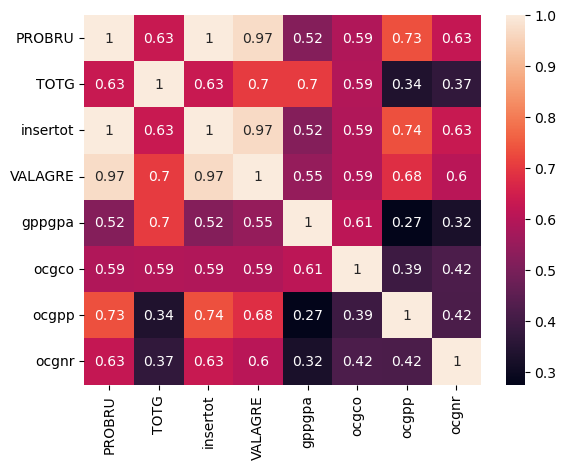

In [57]:
sns.heatmap(db_clean.corr(), annot = True)
#sns.pairplot(data = db_reg, height = 1.5)
plt.show()

In [60]:
#esta sera la database para la regression
db_reg = db_clean.copy()

In [59]:
db_reg.columns

Index(['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp',
       'ocgnr'],
      dtype='object')

In [61]:
#creación de valores ln para cada columna
db_reg[['PROBRU_ln',
        'TOTG_ln',
        'insertot_ln',
        'VALAGRE_ln',
        'gppgpa_ln',
        'ocgco_ln',
        'ocgpp_ln',
        'ocgnr_ln']] = np.log(db_reg[['PROBRU',
                                      'TOTG',
                                      'insertot',
                                      'VALAGRE',
                                      'gppgpa',
                                      'ocgco',
                                      'ocgpp',
                                      'ocgnr']].replace(0, np.nan))

c:\Users\luisr\anaconda3\lib\site-packages\pandas\core\internals\blocks.py:351: RuntimeWarning: invalid value encountered in log
  result = func(self.values, **kwargs)


In [66]:
db_reg.head()

,PROBRU,TOTG,insertot,VALAGRE,gppgpa,ocgco,ocgpp,ocgnr,PROBRU_ln,TOTG_ln,insertot_ln,VALAGRE_ln,gppgpa_ln,ocgco_ln,ocgpp_ln,ocgnr_ln
0,2661282.0,1095630.0,2518262.0,1323870,30600.0,60127.0,2819.0,188284.0,14.794319,13.906840,14.739080,14.096070,10.328755,11.004214,7.944137,12.145707
1,4355860.0,1767399.0,2185760.0,2000387,19692.0,23000.0,58000.0,177000.0,15.287033,14.385020,14.597474,14.508851,9.887968,10.043249,10.968198,12.083905
2,14967912.0,2869476.0,6914281.0,5208456,37122.0,56159.0,30711.0,250014.0,16.521419,14.869640,15.749100,15.465794,10.521965,10.935942,10.332376,12.429272
3,10666938.0,844514.0,8309250.0,4853654,21944.0,23127.0,54097.0,543956.0,16.182660,13.646517,15.932880,15.395242,9.996249,10.048756,10.898534,13.206624
4,24247713.0,2698819.0,6779595.0,3385053,42248.0,167731.0,0.0,3205218.0,17.003833,14.808325,15.729428,15.034880,10.651312,12.030117,NaN,14.980291


In [71]:
db_reg = db_reg.fillna(0)

In [72]:
db_reg.columns

Index(['PROBRU', 'TOTG', 'insertot', 'VALAGRE', 'gppgpa', 'ocgco', 'ocgpp',
       'ocgnr', 'PROBRU_ln', 'TOTG_ln', 'insertot_ln', 'VALAGRE_ln',
       'gppgpa_ln', 'ocgco_ln', 'ocgpp_ln', 'ocgnr_ln'],
      dtype='object')

In [82]:
#nespecificando las variables de la regresión
X = db_reg.loc[:, ['TOTG',
                   #'insertot',
                   #'VALAGRE',
                   'gppgpa',
                   'ocgco',
                   'ocgpp',
                   'ocgnr']].values #variables independientes (Xn)

Y = db_reg.loc[:, ['PROBRU']].values #variable dependiente (Y)

X_log = db_reg.loc[:, ['TOTG_ln',
                       #'insertot_ln',
                       #'VALAGRE_ln',
                       'gppgpa_ln',
                       'ocgco_ln',
                       'ocgpp_ln',
                       'ocgnr_ln']].values #variables independientes alt_log (Xn)

Y_log = db_reg.loc[:, ['PROBRU_ln']].values #variable dependiente alt_log (Y)

In [83]:
print(lr.fit(X, Y))
print(lr.score(X, Y)) #R^2
print(lr.coef_) #pendientes de cada variable
print(lr.intercept_) #intercepto de la recta de regresión con Y

LinearRegression()
0.7757132759427805
[[ 1.42082713 27.41876077 20.66202781 19.19732286  9.785637  ]]
[-859775.0755136]


In [84]:
import statsmodels.api as sm
model = sm.OLS(Y, X).fit()
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.786
Model:                            OLS   Adj. R-squared (uncentered):              0.786
Method:                 Least Squares   F-statistic:                              4632.
Date:                Fri, 28 Apr 2023   Prob (F-statistic):                        0.00
Time:                        13:28:38   Log-Likelihood:                     -1.2231e+05
No. Observations:                6321   AIC:                                  2.446e+05
Df Residuals:                    6316   BIC:                                  2.447e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Análisis de R^2

In [85]:
#mejor R2
R2s = []

#R2_lineal
lr.fit(X, Y)
R2 = lr.score(X, Y)
R2s.append((R2, 'LINEAL'))

#R2_log
lr.fit(X_log, Y)
R2 = lr.score(X_log, Y)
R2s.append((R2, 'LOGARÍTMICA'))

#R2_exp
lr.fit(X, Y_log)
R2 = lr.score(X, Y_log)
R2s.append((R2, 'EXPONENCIAL'))

#R2_pot
lr.fit(X_log, Y_log)
R2 = lr.score(X_log, Y_log)
R2s.append((R2, 'POTENCIAL'))

for r2 in R2s:
    print(r2)

max_R2 = max(R2s, key=lambda x: x[0]) #recomendación para modelo
print('\nRECOMENDACIÓN: El mejor R2 ({:.2f}) lo arroja una regresión: {}.'.format(max_R2[0],
                                                                                  max_R2[1]))

(0.7757132759427805, 'LINEAL')
(0.05938894529292882, 'LOGARÍTMICA')
(0.0921764488663257, 'EXPONENCIAL')
(0.8440884358718378, 'POTENCIAL')

RECOMENDACIÓN: El mejor R2 (0.84) lo arroja una regresión: POTENCIAL.
